In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas_datareader import DataReader

In [3]:
from datetime import datetime

In [4]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

tech_list = ['AAPL', 'GOOG', 'MSFT', "AMZN"]

In [5]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo',start,end)

In [6]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-04-12,175.000000,173.039993,173.410004,174.139999,22889300.0,171.528107
2018-04-13,175.839996,173.850006,174.779999,174.729996,25124300.0,172.109268
2018-04-16,176.190002,174.830002,175.029999,175.820007,21578400.0,173.182922
2018-04-17,178.940002,176.410004,176.490005,178.240005,26509000.0,175.566620
2018-04-18,178.820007,176.880005,177.809998,177.839996,20754500.0,175.172607


In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,191.137155,187.425612,189.285455,189.351660,3.236507e+07,188.008291
std,21.779037,21.470132,21.610646,21.613495,1.429637e+07,21.313140
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,174.949997,172.100006,173.490005,174.139999,2.273770e+07,172.970001
50%,189.529999,186.779999,188.350006,188.149994,2.840280e+07,186.467804
75%,209.250000,205.479996,207.279999,207.529999,3.876780e+07,205.875610
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-04-12 to 2019-04-12
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


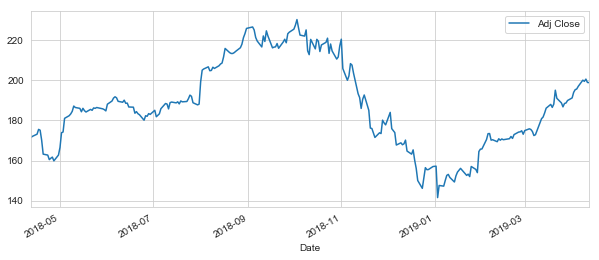

In [9]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

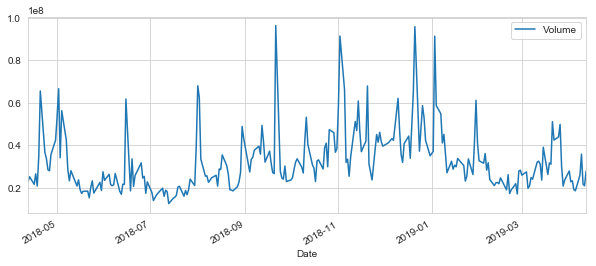

In [10]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [13]:
#Moving Average
ma_day = [10,20,50]

for ma in ma_day:
    column_names = "MA for %s days" %(str(ma))
    
    AAPL[column_names] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

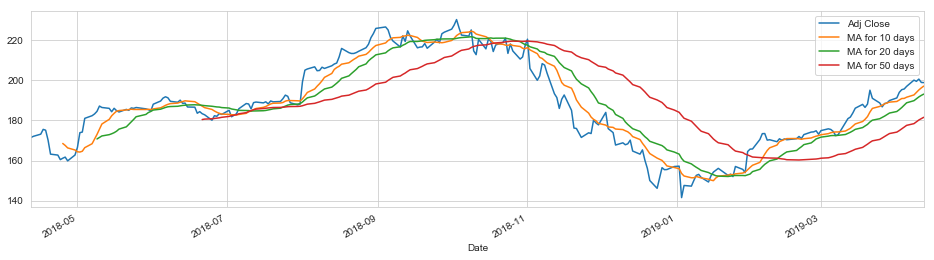

In [19]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(16,4))

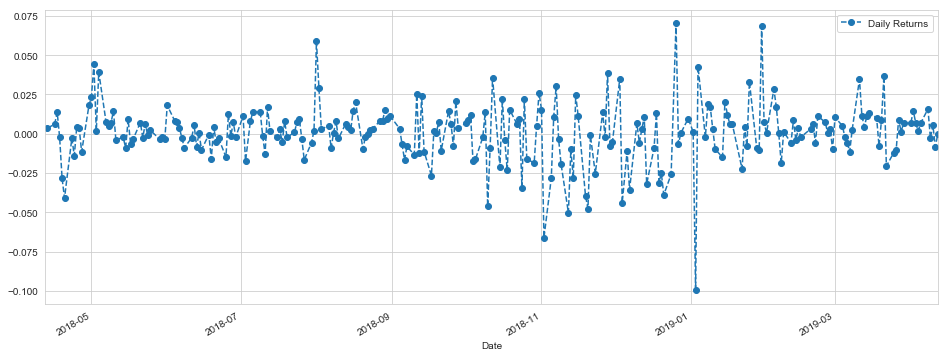

In [22]:
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Returns'].plot(figsize=(16,6), legend=True, linestyle="--",marker="o")

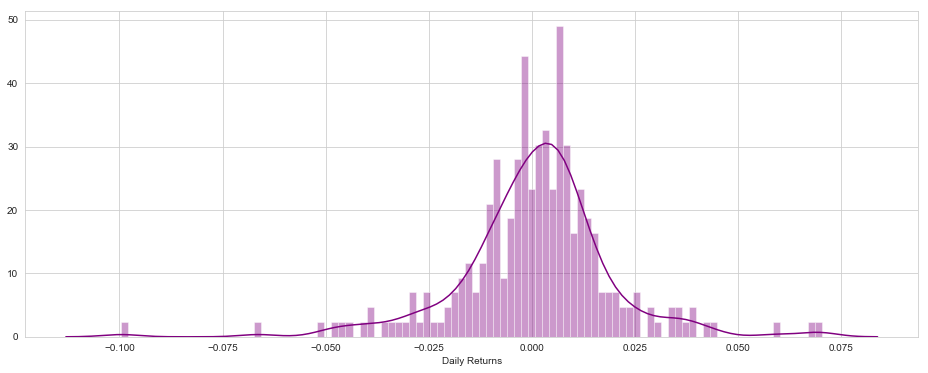

In [24]:
plt.figure(figsize=(16,6))
sns.distplot(AAPL['Daily Returns'].dropna(),hist=True, bins=100, color='purple')

In [25]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [29]:
tech_rets = closing_df.pct_change()

In [30]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-12,NaN,NaN,NaN,NaN
2018-04-13,0.003388,-0.012226,-0.003138,-0.005343
2018-04-16,0.006238,0.007485,0.008462,0.011710
2018-04-17,0.013764,0.043240,0.034856,0.020176
2018-04-18,-0.002244,0.015966,-0.001936,0.003851


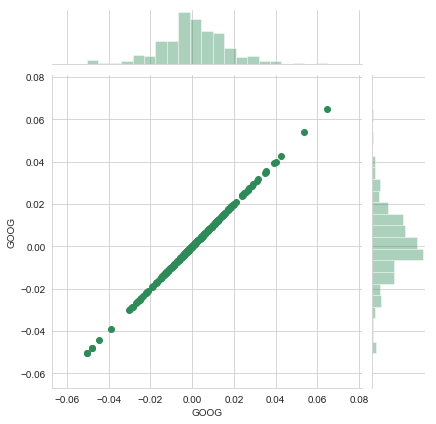

In [32]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind="scatter", color='seagreen')

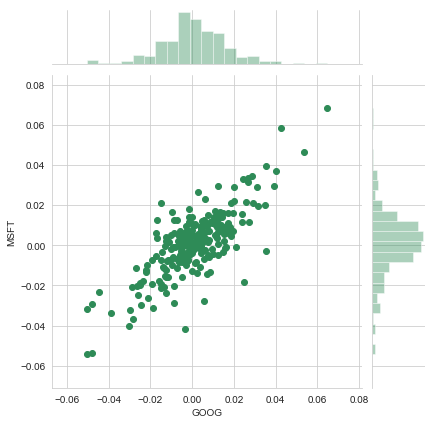

In [34]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind="scatter", color='seagreen')

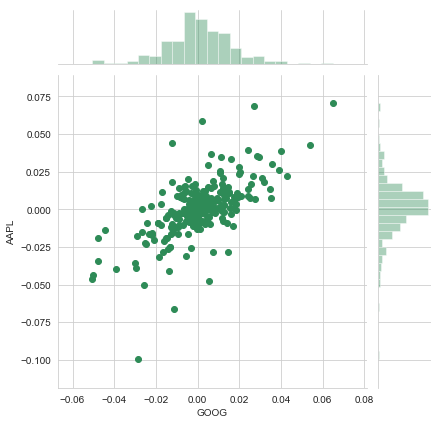

In [35]:
sns.jointplot('GOOG', 'AAPL', tech_rets, kind="scatter", color='seagreen')

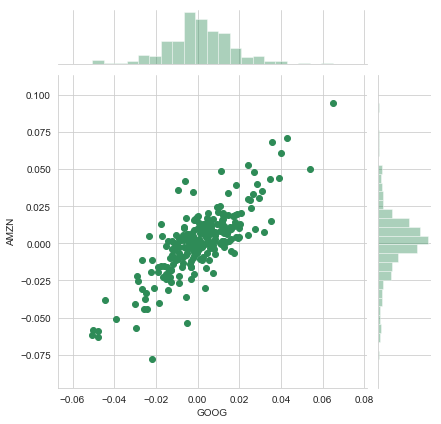

In [36]:
sns.jointplot('GOOG', 'AMZN', tech_rets, kind="scatter", color='seagreen',)

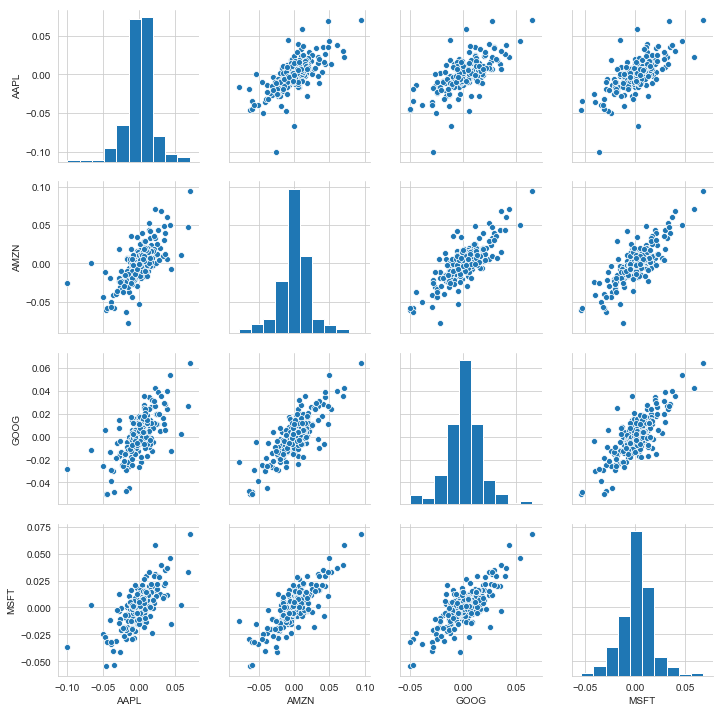

In [41]:
sns.pairplot(tech_rets.dropna(), palette='cool')

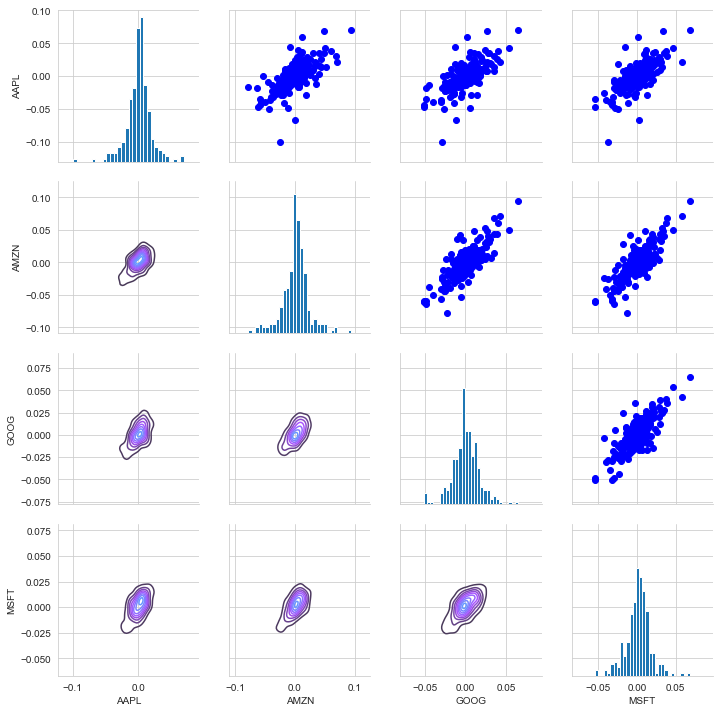

In [45]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter,color='b')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

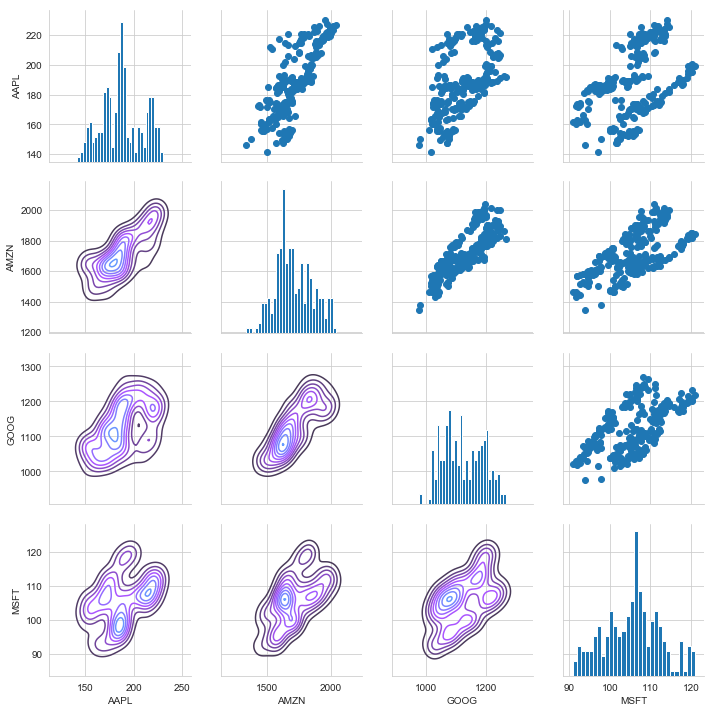

In [47]:
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter,cmap='cool')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

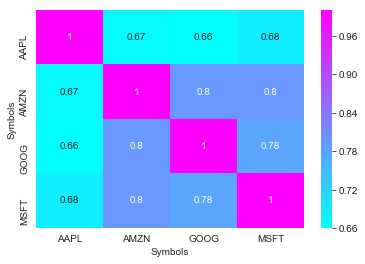

In [53]:
sns.heatmap(tech_rets.dropna().corr(),annot=True, cmap='cool')

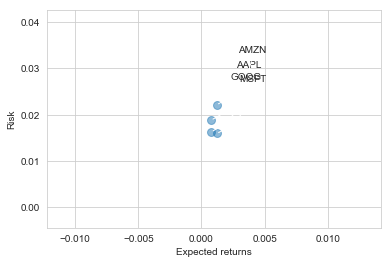

In [56]:
#Risk Analysis

# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
#plt.ylim([0.01,0.025])
#plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [60]:
rets['AAPL'].quantile(0.05)
#-0.029649806519004125 is the output.
#The 0.05 empirical quantile of daily returns is at -0.029. That means that with 95% confidence, our worst daily loss will not exceed 2.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.029 * 1,000,000 = $29,000.

-0.029649806519004125

In [63]:
# set up our time horizon
days = 365

# Now Delta 
dt = 1/days

# mew(drift) drom the expected return
mu = rets.mean()['GOOG']

# grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [84]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale = sigma * np.sqrt(dt))
        
        # Calculate Drift
        drift[x] = mu * dt
    
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [85]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-04-12,1040.689941,1021.434998,1025.040039,1032.510010,1357000,1032.510010
2018-04-13,1046.420044,1022.979980,1040.880005,1029.270020,1223000,1029.270020
2018-04-16,1043.239990,1026.739990,1037.000000,1037.979980,1211200,1037.979980
2018-04-17,1077.880005,1048.260010,1051.369995,1074.160034,2320300,1074.160034
2018-04-18,1077.430054,1066.224976,1077.430054,1072.079956,1344100,1072.079956


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

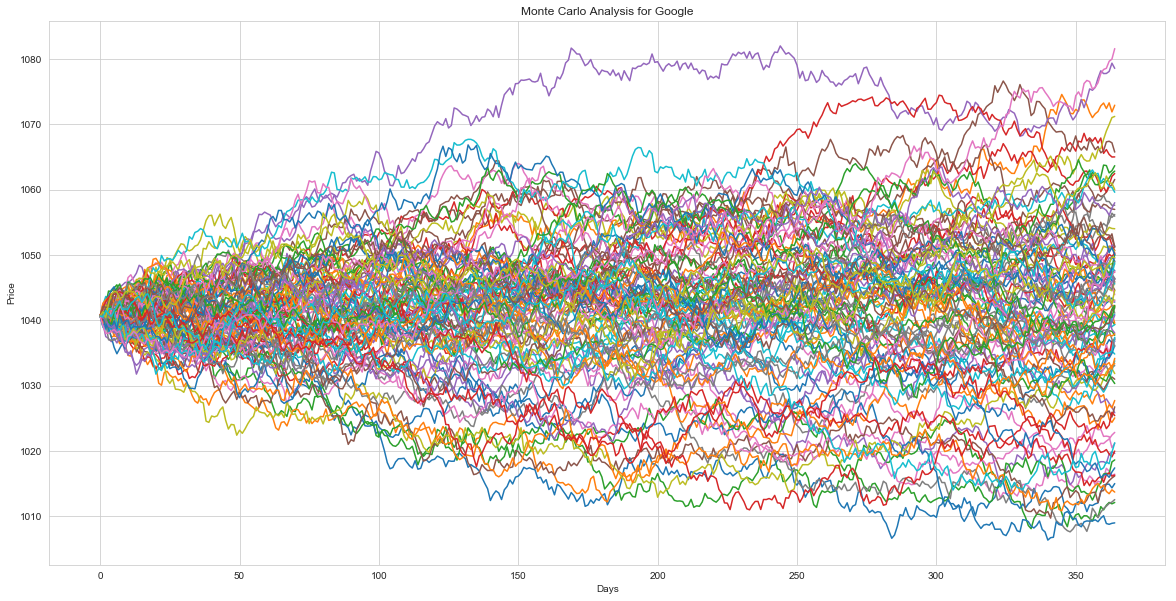

In [93]:
# Get start price from GOOG.head()
start_price = 1040.68
plt.figure(figsize=(20,10))

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')


In [ ]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

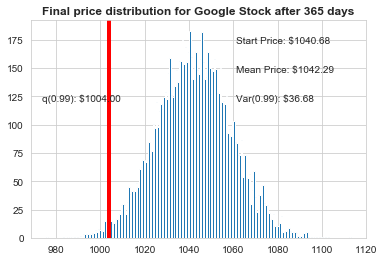

In [95]:
#Define q as the 1% empirical quantile, this basically means that 99% of the values should fall between there
q = np.percentile(simulations, 1)

# plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Strating Price
plt.figtext(0.6, 0.8, s="Start Price: $%.2f" %start_price)

# Mean Price
plt.figtext(0.6, 0.7, s="Mean Price: $%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s="Var(0.99): $%.2f" %(start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [96]:
# The 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock,
# which looks to be $36.68 for every investment of 1040.68 (the price of one inital google stock).
# This basically menas for every initial stock you purchase your putting about $18.38 at risk 99%
# of the time from our Monte Carlo Simulation.